# 1. Import libraries and data
- I started by importing all the necessary libraries like NumPy, pandas, seaborn, and matplotlib for data manipulation and visualization.

- I also imported modules like MinMaxScaler, MiniSom, TensorFlow, and Optuna for modeling.

- After that, I loaded the credit scoring data from scoring.xlsx.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

from minisom import MiniSom

from sklearn.preprocessing import MinMaxScaler
from pylab import bone, pcolor, colorbar, plot, show
from sklearn.preprocessing import StandardScaler

import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Nadam
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split

# 2. Descriptive Statistics
- I displayed the first few rows of the dataset to understand the structure.

- Then, I ran .describe(include='all') to explore the statistical summary of all columns.


In [3]:
df = pd.read_excel('scoring.xlsx')
df

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,3,23.0,12,19114.12,1824.843333,3,4,3,4.0,...,4.0,3,809.98,26.822620,1,49.574949,80.415295,3,312.494089,0
1,CUS_0xd40,2,23.0,12,19114.12,NaN,3,4,3,4.0,...,4.0,1,809.98,31.944960,1,49.574949,118.280222,4,284.629162,0
2,CUS_0xd40,6,-500.0,12,19114.12,NaN,3,4,3,4.0,...,4.0,1,809.98,28.609352,1,49.574949,81.699521,5,331.209863,0
3,CUS_0xd40,0,23.0,12,19114.12,NaN,3,4,3,4.0,...,4.0,1,809.98,31.377862,1,49.574949,199.458074,6,223.451310,0
4,CUS_0xd40,7,23.0,12,19114.12,1824.843333,3,4,3,4.0,...,4.0,1,809.98,24.797347,1,49.574949,41.420153,2,341.489231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,0,25.0,9,39628.99,3359.415833,4,6,7,2.0,...,3.0,3,502.38,34.663572,1,35.104023,60.971333,1,479.866228,1
99996,CUS_0x942c,7,25.0,9,39628.99,3359.415833,4,6,7,2.0,...,3.0,3,502.38,40.565631,1,35.104023,54.185950,2,496.651610,1
99997,CUS_0x942c,5,25.0,9,39628.99,3359.415833,4,6,5729,2.0,...,3.0,1,502.38,41.255522,1,35.104023,24.028477,1,516.809083,1
99998,CUS_0x942c,4,25.0,9,39628.99,3359.415833,4,6,7,2.0,...,3.0,1,502.38,33.638208,1,35.104023,251.672582,4,319.164979,0


In [4]:
df.describe(include = 'all')

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000.000000,95061.000000,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,95215.000000,...,98035.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,95521.000000,100000.000000,9.880000e+04,100000.000000
unique,12500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CUS_0xd40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.500000,110.934505,7.523380,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,2.780339,...,27.754251,1.578800,1426.220376,32.285173,1.403190,1403.118217,637.412998,3.469040,3.036437e+22,0.289980
std,NaN,2.291299,689.407864,4.640296,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,62.500940,...,193.177339,1.013647,1155.129026,5.116875,0.693378,8306.041270,2043.319327,2.035471,3.181295e+24,0.453755
min,NaN,0.000000,-500.000000,0.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,...,0.000000,0.000000,0.230000,20.000000,0.000000,0.000000,0.000000,0.000000,7.759665e-03,0.000000
25%,NaN,1.750000,24.000000,4.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,...,3.000000,1.000000,566.072500,28.052567,1.000000,30.306660,74.534002,2.000000,2.701145e+02,0.000000
50%,NaN,3.500000,33.000000,7.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,...,6.000000,2.000000,1166.155000,32.305784,2.000000,69.249473,135.925682,3.000000,3.367423e+02,0.000000
75%,NaN,5.250000,42.000000,12.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,...,9.000000,2.000000,1945.962500,36.496663,2.000000,161.224249,265.731733,6.000000,4.703321e+02,1.000000


# 3. Handle Missing Values
- I checked for missing values using .isnull().sum().

- For categorical features, I filled missing values with the mode.

- For numerical features, I filled missing values using the mean.


In [6]:
df.isnull().sum()

Customer_ID                     0
Month                           0
Age                          4939
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  4785
Delay_from_due_date             0
Num_of_Delayed_Payment       9746
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [7]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i].fillna(value=df[i].mode()[0],inplace = True)
    else:
        df[i].fillna(value=df[i].mean(),inplace = True)

C:\Users\NIcat\AppData\Local\Temp\ipykernel_15052\2292325759.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(value=df[i].mode()[0],inplace = True)
C:\Users\NIcat\AppData\Local\Temp\ipykernel_15052\2292325759.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [8]:
df.isnull().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

# 4. Outlier Treatment
- I visualized each numerical feature using seaborn’s boxplots to detect outliers.

- Then, I calculated the IQR (interquartile range) and used it to filter or cap outliers.

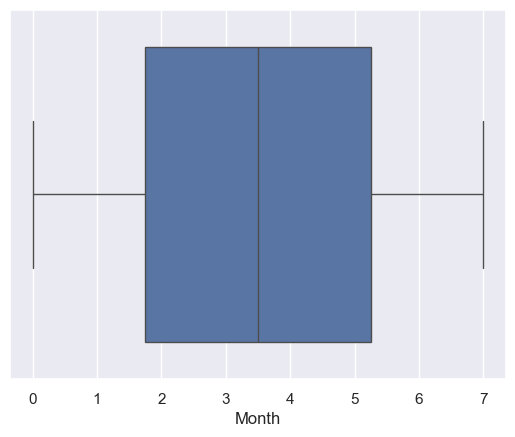

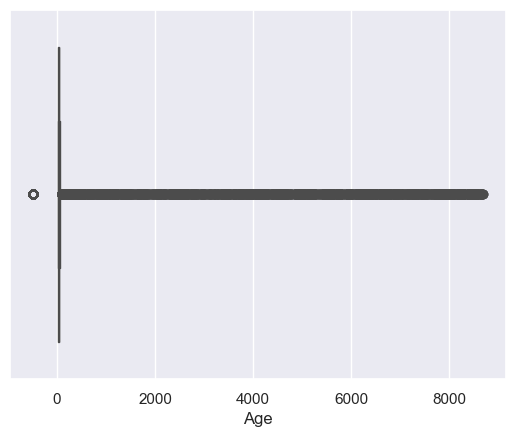

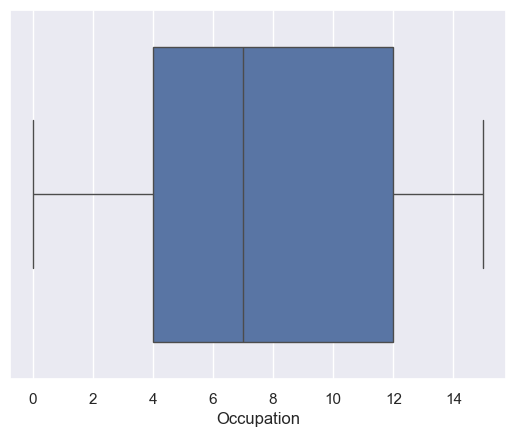

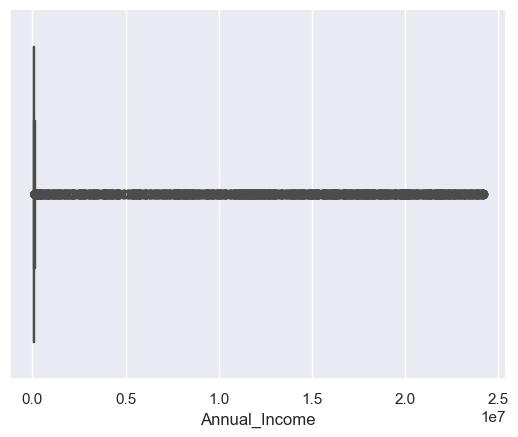

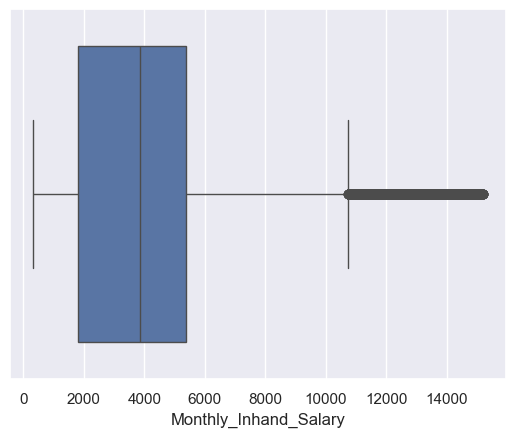

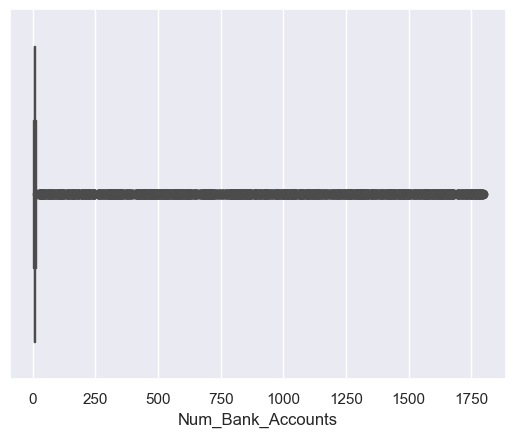

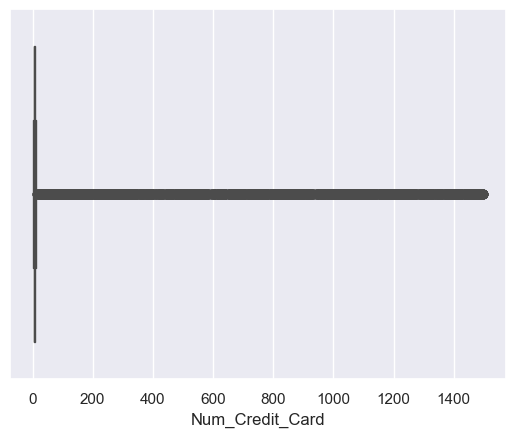

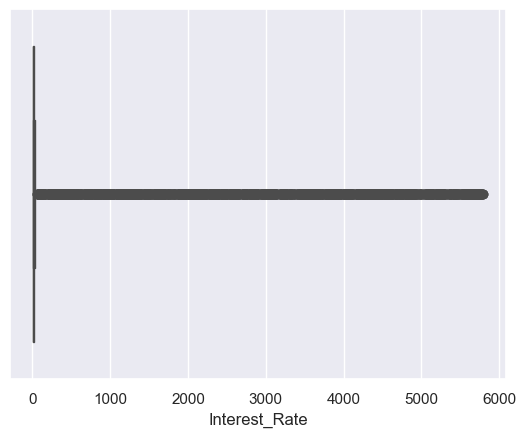

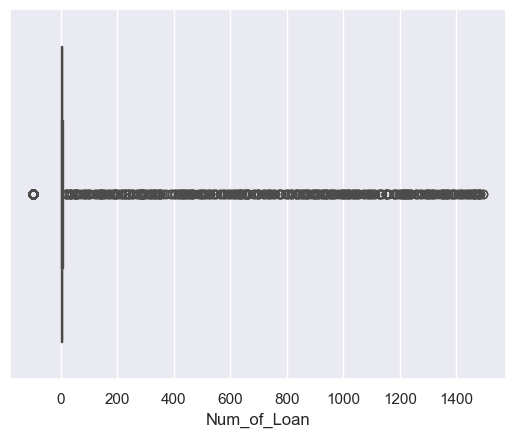

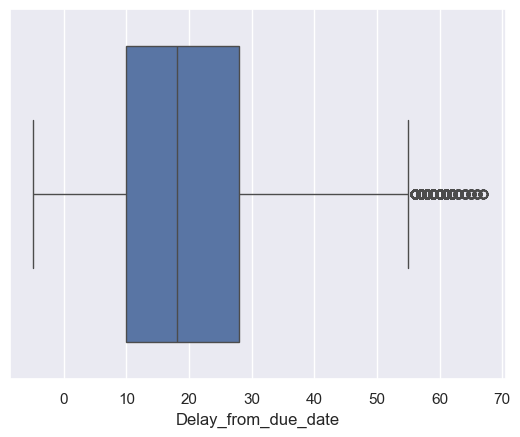

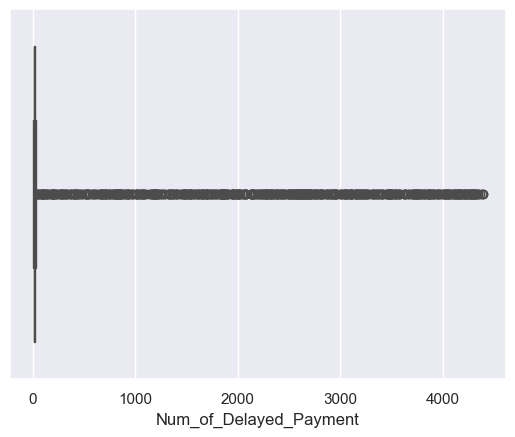

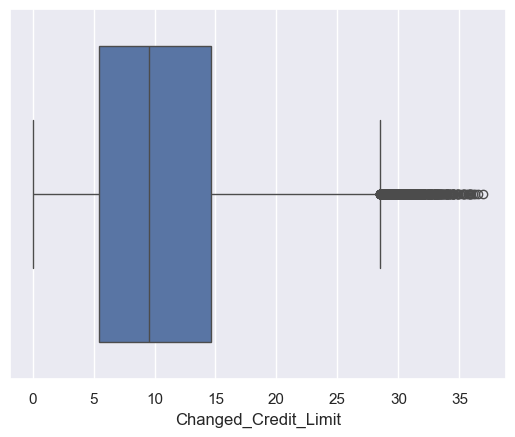

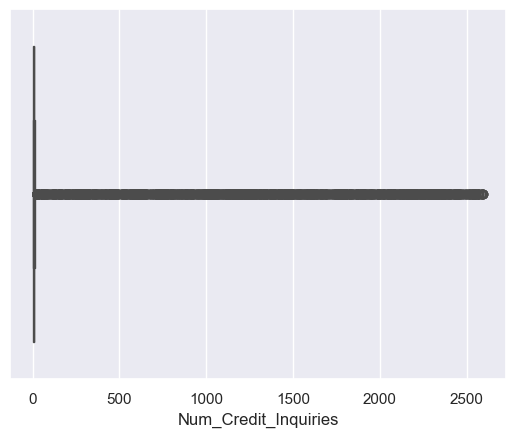

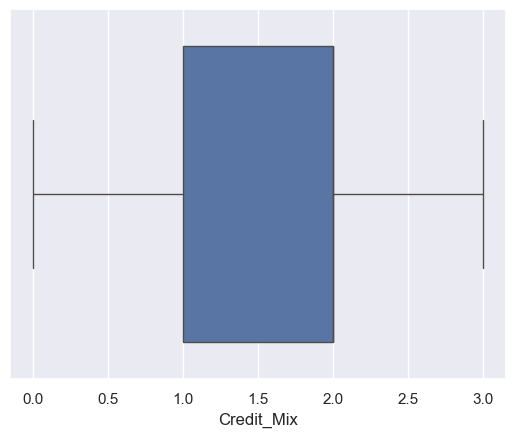

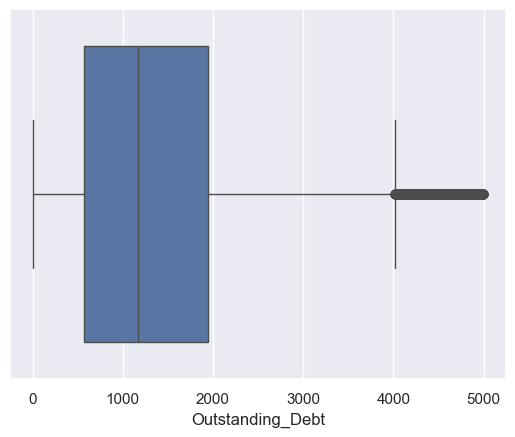

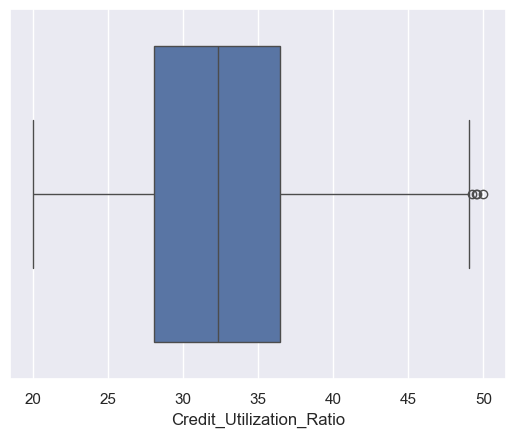

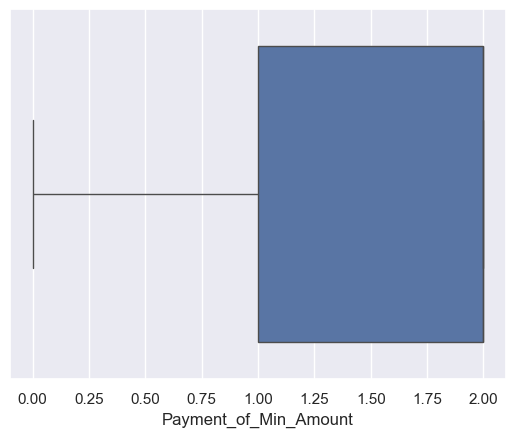

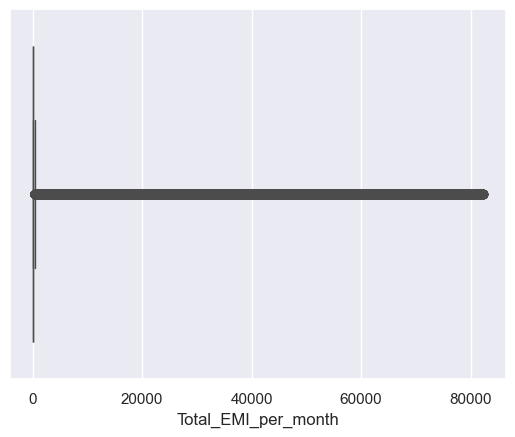

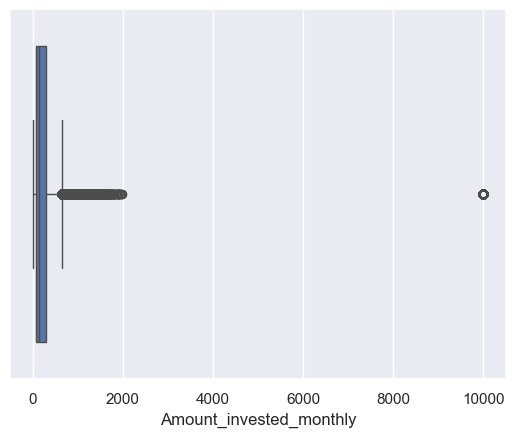

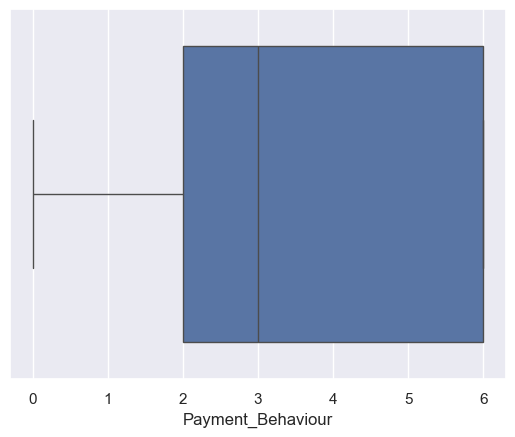

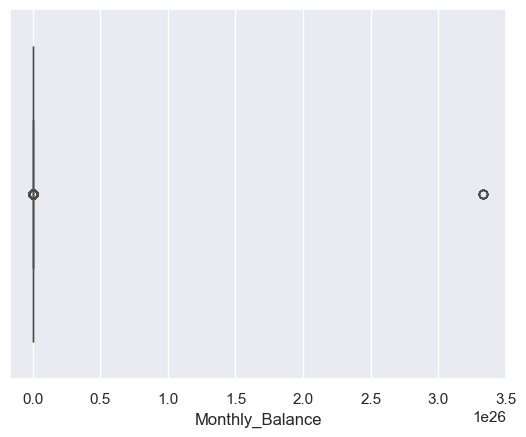

In [10]:
for i in df.columns[1:-1]:
    sns.boxplot(data=df,x=df[i])
    plt.show()
    

In [11]:
q1=df.quantile(0.25, numeric_only=True)
q3=df.quantile(0.75, numeric_only=True)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

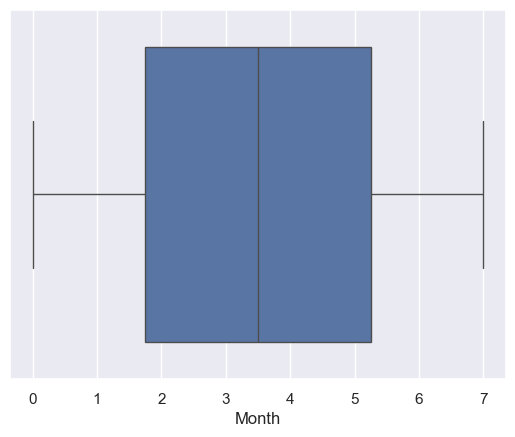

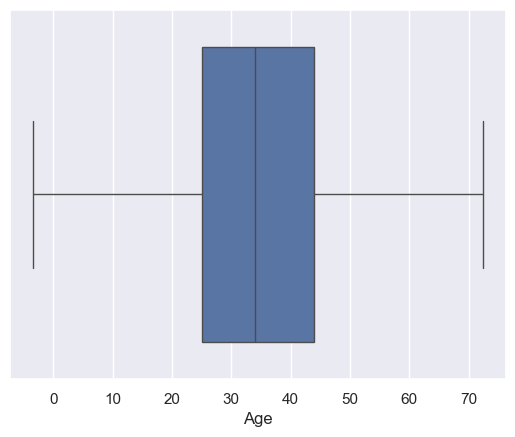

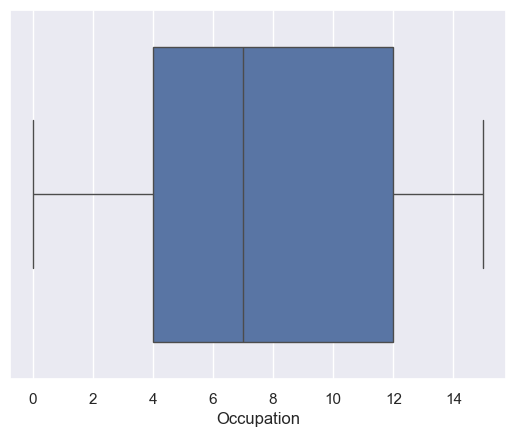

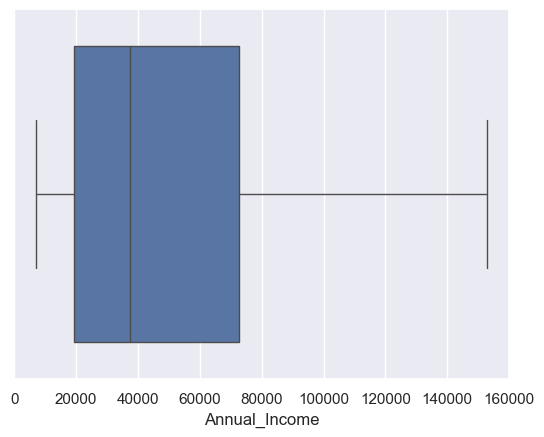

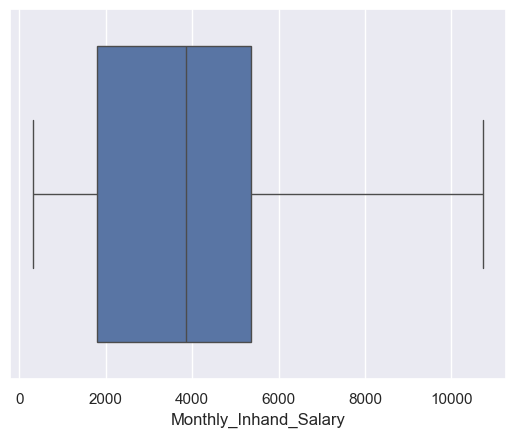

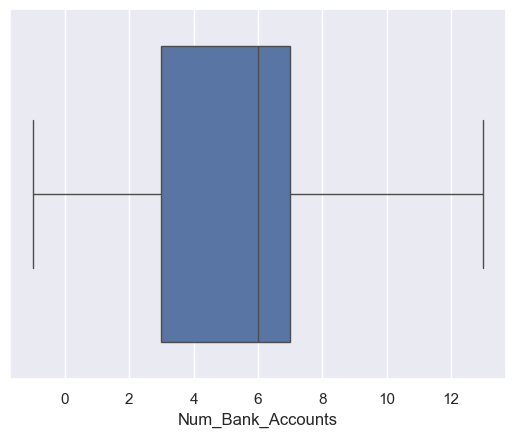

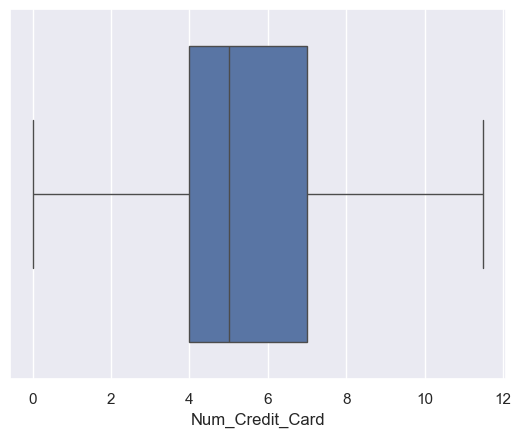

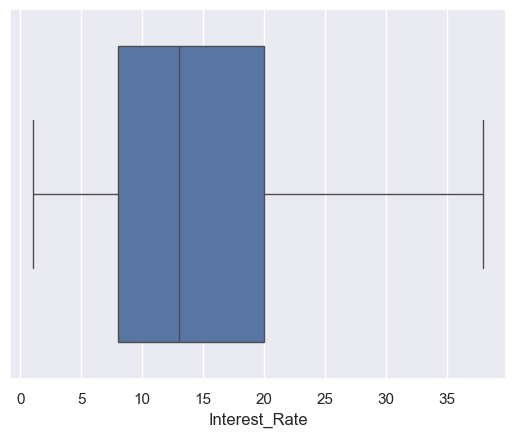

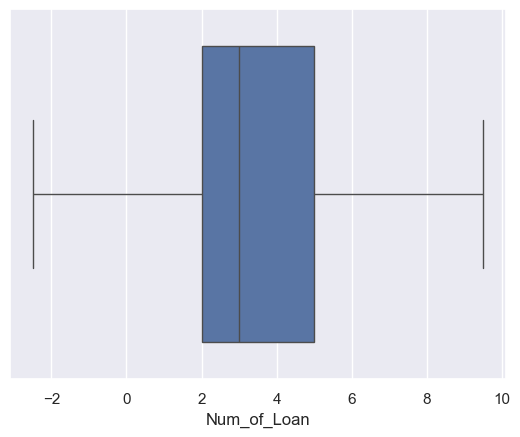

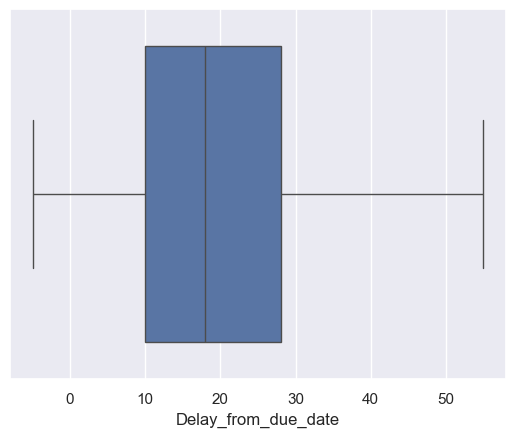

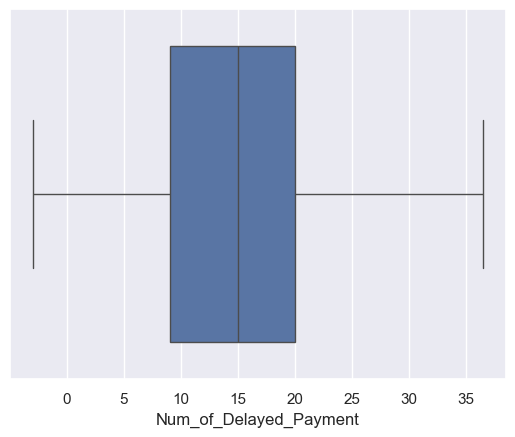

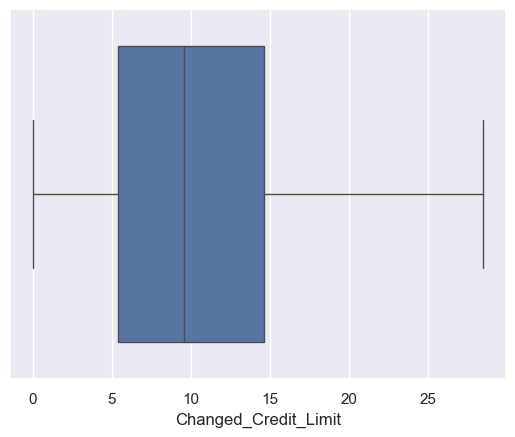

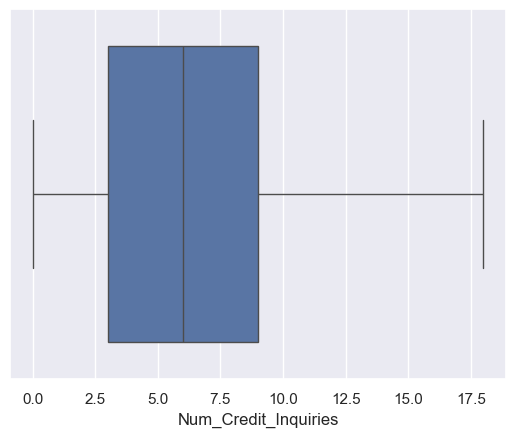

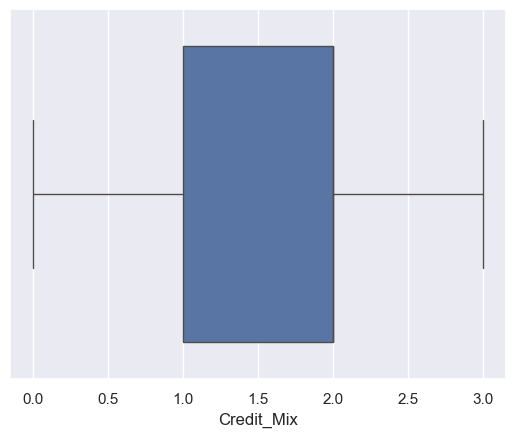

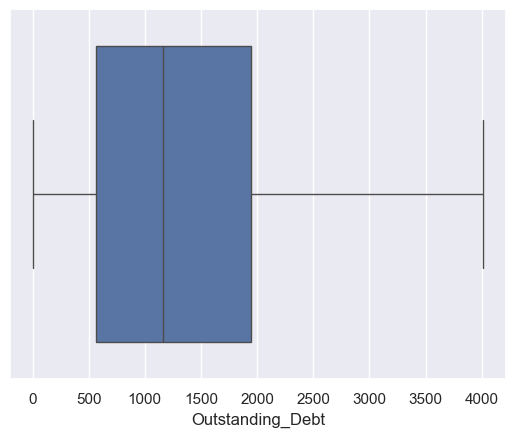

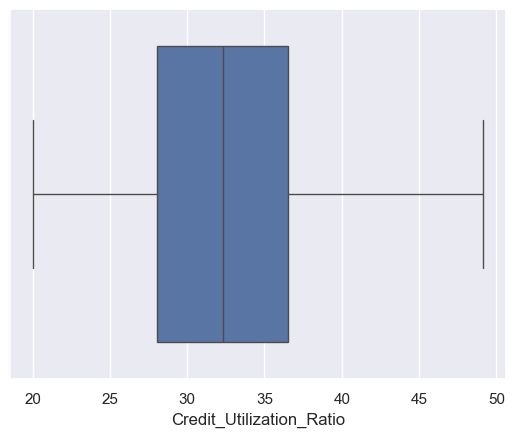

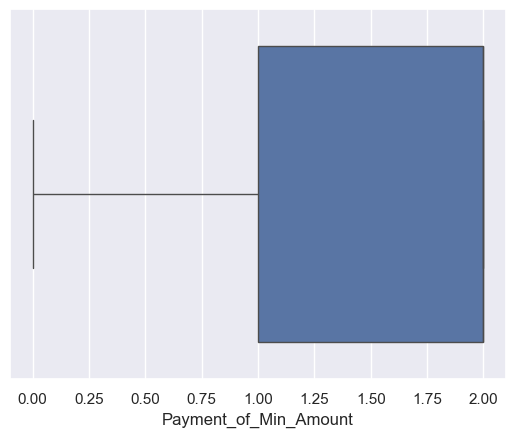

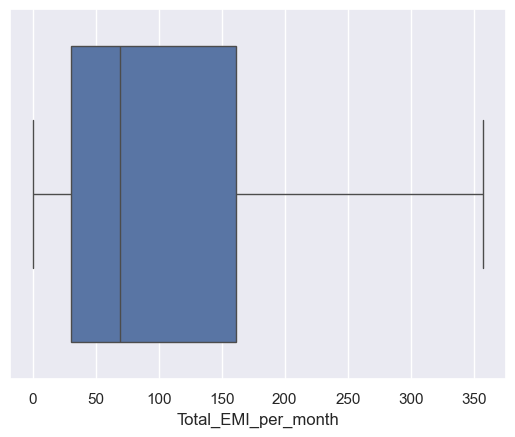

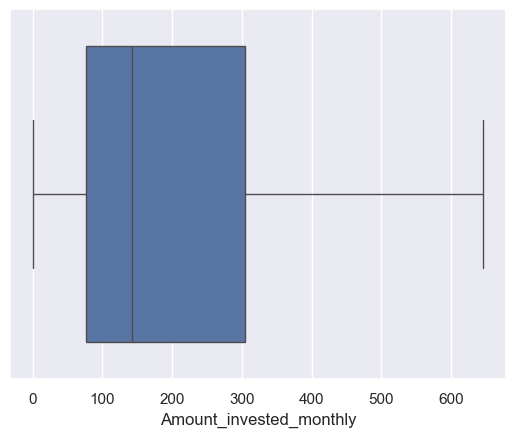

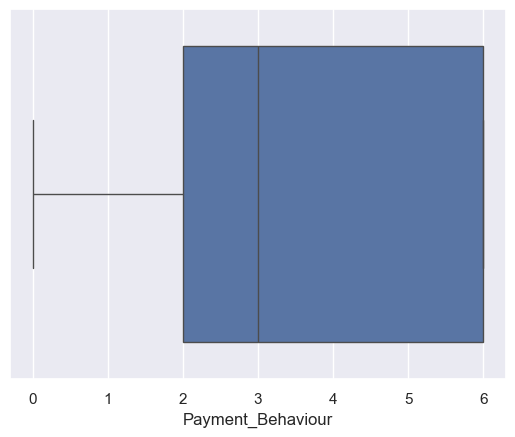

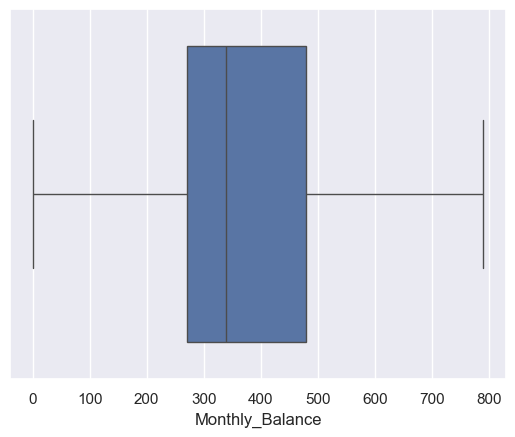

In [12]:
for i in df.columns[1:-1]:
    df[i] = np.where(df[i] > Upper[i],Upper[i],df[i])
    df[i] = np.where(df[i] < Lower[i],Lower[i],df[i])
    sns.boxplot(data=df,x=df[i])
    plt.show()

# 5. Define Inputs and Target
- I dropped the irrelevant columns like Customer_ID and the target Credit_Score from the input features.

- I defined Credit_Score as my target variable.

In [14]:
df.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [15]:
inputs = df.drop(['Customer_ID','Credit_Score'],axis=1)
target = df['Credit_Score']

In [16]:
inputs.shape

(100000, 21)

In [17]:
target

0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    0
99999    1
Name: Credit_Score, Length: 100000, dtype: int64

In [18]:
y=target

# 6. Scale the Data
- I applied MinMaxScaler to normalize all input features between 0 and 1.

- This was essential before feeding the data into the SOM.


In [20]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
inputs_scaled = sc.fit_transform(inputs)

In [21]:
inputs_scaled

array([[0.42857143, 0.34868421, 0.8       , ..., 0.12440718, 0.5       ,
        0.39551577],
       [0.28571429, 0.34868421, 0.8       , ..., 0.18298645, 0.66666667,
        0.36024697],
       [0.85714286, 0.        , 0.8       , ..., 0.12639396, 0.83333333,
        0.41920443],
       ...,
       [0.71428571, 0.375     , 0.6       , ..., 0.03717347, 0.16666667,
        0.65411844],
       [0.57142857, 0.375     , 0.6       , ..., 0.38935226, 0.66666667,
        0.40395915],
       [0.14285714, 0.375     , 0.6       , ..., 0.25861231, 0.        ,
        0.49826527]])

# 7. Optimize SOM Parameters with Optuna
- I defined an Optuna objective function to optimize SOM parameters such as grid size (x, y), sigma, and learning_rate.

- I ran the optimization to find the best parameters for training the SOM.


In [23]:
import optuna
from sklearn.metrics import silhouette_score

def objective(trial):

    x = trial.suggest_int("x", 10, 20)  # Grid size x
    y = trial.suggest_int("y", 10, 20)  # Grid size y
    sigma = trial.suggest_float("sigma", 0.1, 2.0, log=True)  # Spread of the neighborhood
    learning_rate = trial.suggest_float("learning_rate", 0.01, 1.0, log=True)  # Learning rate
    num_iteration = trial.suggest_int("num_iteration", 50, 500)  # Training iterations

    # Initialize SOM
    som = MiniSom(x=x, y=y, input_len=inputs_scaled.shape[1], sigma=sigma, learning_rate=learning_rate)
    som.random_weights_init(inputs_scaled)
    som.train_random(data=inputs_scaled, num_iteration=num_iteration)
    
    # Assign each input to the closest SOM neuron
    labels = np.array([som.winner(x) for x in inputs_scaled])
    print(labels)
    # Flatten the neuron indices for silhouette_score
    flattened_labels = [i[0] * y + i[1] for i in labels]
    
    # Evaluate clustering using silhouette score (higher is better)
    try:
        score = silhouette_score(inputs_scaled, flattened_labels)
    except ValueError:
        score = -1  # Assign a negative score if clustering fails
    
    return score

# Run the optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

# Display the best parameters
print("Best parameters:", study.best_params)
print("Best silhouette score:", study.best_value)


[I 2025-06-17 11:42:33,192] A new study created in memory with name: no-name-004560d4-4c59-4614-828a-3eedbf5094bc


[[ 2  9]
 [ 7 18]
 [10 15]
 ...
 [ 6 16]
 [ 7 18]
 [ 0 15]]


[I 2025-06-17 11:44:29,554] Trial 0 finished with value: 0.013115849792821727 and parameters: {'x': 13, 'y': 19, 'sigma': 0.7722939382929082, 'learning_rate': 0.04546929130050331, 'num_iteration': 63}. Best is trial 0 with value: 0.013115849792821727.


[[ 7  7]
 [11  4]
 [ 7  6]
 ...
 [ 3  2]
 [11  5]
 [ 6  8]]


[I 2025-06-17 11:46:24,520] Trial 1 finished with value: -0.011216310082250236 and parameters: {'x': 12, 'y': 13, 'sigma': 1.736146434235074, 'learning_rate': 0.39305947864150365, 'num_iteration': 213}. Best is trial 0 with value: 0.013115849792821727.


[[15  9]
 [17  0]
 [ 3 11]
 ...
 [ 7 12]
 [17  0]
 [ 0 11]]


[I 2025-06-17 11:48:17,696] Trial 2 finished with value: 0.017243046262402983 and parameters: {'x': 18, 'y': 13, 'sigma': 0.9144236616751712, 'learning_rate': 0.017774916956044513, 'num_iteration': 165}. Best is trial 2 with value: 0.017243046262402983.


[[15  2]
 [ 7  5]
 [15 15]
 ...
 [ 4  8]
 [ 6  4]
 [ 7  2]]


[I 2025-06-17 11:50:03,544] Trial 3 finished with value: 0.012732303038641372 and parameters: {'x': 16, 'y': 20, 'sigma': 0.387724185594379, 'learning_rate': 0.335839100476569, 'num_iteration': 183}. Best is trial 2 with value: 0.017243046262402983.


[[ 4  4]
 [ 7  2]
 [ 3 11]
 ...
 [ 0  7]
 [ 3 11]
 [ 7  2]]


[I 2025-06-17 11:51:48,061] Trial 4 finished with value: 0.012370435113570258 and parameters: {'x': 10, 'y': 14, 'sigma': 0.7262973224115453, 'learning_rate': 0.09039455490497596, 'num_iteration': 75}. Best is trial 2 with value: 0.017243046262402983.


[[ 6  5]
 [ 7  4]
 [ 3  9]
 ...
 [ 3  4]
 [ 3  9]
 [11  4]]


[I 2025-06-17 11:53:31,833] Trial 5 finished with value: 0.015167302952042093 and parameters: {'x': 14, 'y': 10, 'sigma': 0.477944862824045, 'learning_rate': 0.36147102979724666, 'num_iteration': 143}. Best is trial 2 with value: 0.017243046262402983.


[[ 1  0]
 [16  9]
 [ 6  6]
 ...
 [19  7]
 [16  9]
 [ 5  4]]


[I 2025-06-17 11:55:16,115] Trial 6 finished with value: 0.007973048491297582 and parameters: {'x': 20, 'y': 11, 'sigma': 1.4440680986159713, 'learning_rate': 0.7436343625961195, 'num_iteration': 61}. Best is trial 2 with value: 0.017243046262402983.


[[ 2  8]
 [ 7  0]
 [13  7]
 ...
 [14  2]
 [ 7  0]
 [14  4]]


[I 2025-06-17 11:57:01,403] Trial 7 finished with value: 0.010962665680125605 and parameters: {'x': 16, 'y': 20, 'sigma': 0.5482052488060475, 'learning_rate': 0.4526630816035872, 'num_iteration': 120}. Best is trial 2 with value: 0.017243046262402983.
[I 2025-06-17 14:07:44,931] Trial 8 finished with value: 0.008076075341836759 and parameters: {'x': 19, 'y': 15, 'sigma': 1.5336455837097034, 'learning_rate': 0.3576250309551052, 'num_iteration': 168}. Best is trial 2 with value: 0.017243046262402983.


[[12  6]
 [ 6  6]
 [ 7  7]
 ...
 [10  9]
 [10 13]
 [12  6]]


[I 2025-06-17 14:09:34,227] Trial 9 finished with value: 0.012375970694463162 and parameters: {'x': 14, 'y': 14, 'sigma': 0.16262944196407264, 'learning_rate': 0.4544341383026476, 'num_iteration': 128}. Best is trial 2 with value: 0.017243046262402983.


Best parameters: {'x': 18, 'y': 13, 'sigma': 0.9144236616751712, 'learning_rate': 0.017774916956044513, 'num_iteration': 165}
Best silhouette score: 0.017243046262402983


In [24]:
best_params = study.best_params
best_params

{'x': 18,
 'y': 13,
 'sigma': 0.9144236616751712,
 'learning_rate': 0.017774916956044513,
 'num_iteration': 165}

# 8. Initialize and Train SOM
- I initialized the SOM using the best parameters obtained from Optuna.

- Then, I trained it using the train_random method on the scaled input data.


In [26]:
# Initialize SOM with the best parameters
som_opt = MiniSom(x=best_params['x'], y=best_params['y'], input_len=21,
              sigma=best_params['sigma'], learning_rate=best_params['learning_rate'])

som_opt.random_weights_init(inputs_scaled)

som_opt.train_random(data=inputs_scaled, num_iteration=best_params['num_iteration'])

# 9. Visualize Distance Map
- I plotted the SOM’s distance map using pcolor() and colorbar().

- I used different markers and colors to indicate accepted and rejected customers on the map.

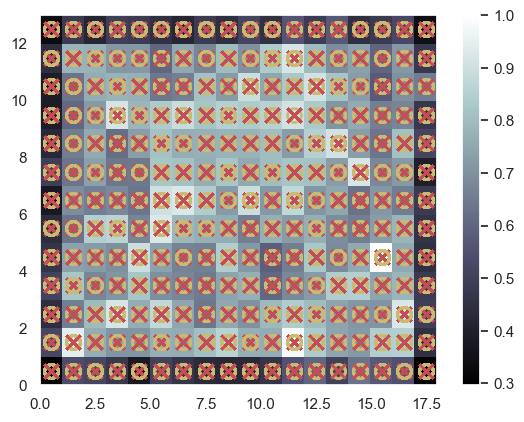

In [28]:
# Original Plot Code
bone()
pcolor(som_opt.distance_map().T)  # Display the distance map
colorbar()
markers = ['x', 'o']  # x for rejected and o for accepted
colors = ['r', 'y']  # r for red and y for yellow

for i, x in enumerate(inputs_scaled):
    w = som_opt.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)

show()

# 10. Extract High Distance Nodes
- I calculated the threshold and extracted node positions with distances greater than or equal to 0.9.

- These nodes were identified as anomalies or suspicious applications.

In [30]:
distance_map = som_opt.distance_map()

threshold = 0.9

white_nodes = [(i, j) for i in range(distance_map.shape[0]) for j in range(distance_map.shape[1]) if distance_map[i, j] >= threshold]

print("Positions of Nodes (Distance >= 0.9):")
for node in white_nodes:
    print(f"Node {node} - Distance: {distance_map[node[0], node[1]]:.2f}")


Positions of Nodes (Distance >= 0.9):
Node (1, 1) - Distance: 0.94
Node (3, 2) - Distance: 0.92
Node (3, 9) - Distance: 0.91
Node (5, 5) - Distance: 0.93
Node (5, 6) - Distance: 0.90
Node (6, 6) - Distance: 0.93
Node (11, 1) - Distance: 0.98
Node (11, 9) - Distance: 0.91
Node (11, 11) - Distance: 0.91
Node (12, 10) - Distance: 0.91
Node (13, 8) - Distance: 0.91
Node (14, 7) - Distance: 0.92
Node (15, 4) - Distance: 1.00
Node (16, 2) - Distance: 0.92


In [31]:
mappings = som_opt.win_map(inputs_scaled)

frauds = []

for node in white_nodes:
    if node in mappings:
        fraud_data = mappings[node]
        frauds.append(fraud_data)

frauds = np.concatenate(frauds, axis=0)

frauds = sc.inverse_transform(frauds)

frauds

array([[  7.        ,  72.5       ,  12.        , ..., 646.38787837,
          6.        ,  14.11872663],
       [  5.        ,  29.        ,   1.        , ..., 646.38787837,
          5.        , 362.31597215],
       [  7.        ,  21.        ,   7.        , ..., 646.38787837,
          3.        , 252.26497568],
       ...,
       [  3.        ,  25.        ,   1.        , ..., 161.33908597,
          6.        , 230.69871647],
       [  4.        ,  26.        ,   0.        , ..., 150.09370613,
          6.        , 220.51538809],
       [  1.        ,  25.        ,   7.        , ..., 370.3398187 ,
          6.        ,   0.71023971]])

In [32]:
frauds_df = pd.DataFrame(frauds, columns=inputs.columns)

frauds_df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,7.0,72.5,12.0,152791.05,10740.686250,0.0,3.0,7.0,2.0,14.0,...,6.080,1.0,1.0,1045.1100,39.203825,1.0,136.988557,646.387878,6.0,14.118727
1,5.0,29.0,1.0,147499.60,10740.686250,2.0,11.5,12.0,2.0,15.0,...,4.210,1.0,3.0,1250.6700,25.767593,1.0,192.206483,646.387878,5.0,362.315972
2,7.0,21.0,7.0,124419.66,10221.305000,3.0,11.5,11.0,4.0,13.0,...,7.120,0.0,3.0,923.8500,39.848598,1.0,344.181536,646.387878,3.0,252.264976
3,5.0,52.0,3.0,110786.64,9299.220000,4.0,6.0,5.0,3.0,16.0,...,8.680,2.0,3.0,226.7000,37.232562,0.0,209.314507,646.387878,6.0,219.435820
4,7.0,34.0,15.0,120366.60,9888.550000,4.0,7.0,2.0,4.0,12.0,...,0.800,6.0,3.0,1396.6400,29.066379,1.0,233.442404,646.387878,5.0,174.957537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514,4.0,29.0,0.0,49354.08,3924.840000,10.0,10.0,17.0,8.0,43.0,...,28.505,7.0,0.0,4015.7975,24.162023,2.0,213.398124,340.983781,4.0,108.102095
3515,1.0,17.0,0.0,50891.94,4194.170850,6.0,6.0,29.0,7.0,25.0,...,25.040,7.0,0.0,4015.7975,23.312567,2.0,222.544419,257.758490,6.0,217.896590
3516,3.0,25.0,1.0,44784.78,3783.065000,9.0,5.0,21.0,9.0,48.0,...,23.300,12.0,0.0,3735.2300,27.385642,2.0,276.268698,161.339086,6.0,230.698716
3517,4.0,26.0,0.0,17984.35,1574.695833,8.0,5.0,33.0,6.0,43.0,...,25.970,6.0,0.0,4015.7975,29.130934,2.0,357.600632,150.093706,6.0,220.515388


In [33]:
df

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,3.0,23.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3.0,809.98,26.822620,1.0,49.574949,80.415295,3.0,312.494089,0
1,CUS_0xd40,2.0,23.0,12.0,19114.12,4194.170850,3.0,4.0,3.0,4.0,...,4.0,1.0,809.98,31.944960,1.0,49.574949,118.280222,4.0,284.629162,0
2,CUS_0xd40,6.0,-3.5,12.0,19114.12,4194.170850,3.0,4.0,3.0,4.0,...,4.0,1.0,809.98,28.609352,1.0,49.574949,81.699521,5.0,331.209863,0
3,CUS_0xd40,0.0,23.0,12.0,19114.12,4194.170850,3.0,4.0,3.0,4.0,...,4.0,1.0,809.98,31.377862,1.0,49.574949,199.458074,6.0,223.451310,0
4,CUS_0xd40,7.0,23.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,1.0,809.98,24.797347,1.0,49.574949,41.420153,2.0,341.489231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,0.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,3.0,3.0,502.38,34.663572,1.0,35.104023,60.971333,1.0,479.866228,1
99996,CUS_0x942c,7.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,3.0,3.0,502.38,40.565631,1.0,35.104023,54.185950,2.0,496.651610,1
99997,CUS_0x942c,5.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,38.0,2.0,...,3.0,1.0,502.38,41.255522,1.0,35.104023,24.028477,1.0,516.809083,1
99998,CUS_0x942c,4.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,3.0,1.0,502.38,33.638208,1.0,35.104023,251.672582,4.0,319.164979,0


In [34]:
common_cols = list(set(df.columns) & set(frauds_df.columns)) 

common_cols

['Num_Credit_Inquiries',
 'Amount_invested_monthly',
 'Changed_Credit_Limit',
 'Num_Bank_Accounts',
 'Credit_Mix',
 'Num_of_Delayed_Payment',
 'Occupation',
 'Credit_Utilization_Ratio',
 'Outstanding_Debt',
 'Num_Credit_Card',
 'Age',
 'Month',
 'Annual_Income',
 'Total_EMI_per_month',
 'Delay_from_due_date',
 'Interest_Rate',
 'Monthly_Inhand_Salary',
 'Payment_Behaviour',
 'Num_of_Loan',
 'Payment_of_Min_Amount',
 'Monthly_Balance']

In [35]:
df1 = df.merge(frauds_df[common_cols].assign(is_fraud=1), how="left", on=common_cols)

df1

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,is_fraud
0,CUS_0xd40,3.0,23.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,3.0,809.98,26.822620,1.0,49.574949,80.415295,3.0,312.494089,0,NaN
1,CUS_0xd40,2.0,23.0,12.0,19114.12,4194.170850,3.0,4.0,3.0,4.0,...,1.0,809.98,31.944960,1.0,49.574949,118.280222,4.0,284.629162,0,NaN
2,CUS_0xd40,6.0,-3.5,12.0,19114.12,4194.170850,3.0,4.0,3.0,4.0,...,1.0,809.98,28.609352,1.0,49.574949,81.699521,5.0,331.209863,0,NaN
3,CUS_0xd40,0.0,23.0,12.0,19114.12,4194.170850,3.0,4.0,3.0,4.0,...,1.0,809.98,31.377862,1.0,49.574949,199.458074,6.0,223.451310,0,NaN
4,CUS_0xd40,7.0,23.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1.0,809.98,24.797347,1.0,49.574949,41.420153,2.0,341.489231,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,0.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,3.0,502.38,34.663572,1.0,35.104023,60.971333,1.0,479.866228,1,NaN
99996,CUS_0x942c,7.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,3.0,502.38,40.565631,1.0,35.104023,54.185950,2.0,496.651610,1,NaN
99997,CUS_0x942c,5.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,38.0,2.0,...,1.0,502.38,41.255522,1.0,35.104023,24.028477,1.0,516.809083,1,NaN
99998,CUS_0x942c,4.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1.0,502.38,33.638208,1.0,35.104023,251.672582,4.0,319.164979,0,NaN


In [36]:
df1["is_fraud"] = np.where(df1["is_fraud"].isna(),0,1)

df1

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,is_fraud
0,CUS_0xd40,3.0,23.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,3.0,809.98,26.822620,1.0,49.574949,80.415295,3.0,312.494089,0,0
1,CUS_0xd40,2.0,23.0,12.0,19114.12,4194.170850,3.0,4.0,3.0,4.0,...,1.0,809.98,31.944960,1.0,49.574949,118.280222,4.0,284.629162,0,0
2,CUS_0xd40,6.0,-3.5,12.0,19114.12,4194.170850,3.0,4.0,3.0,4.0,...,1.0,809.98,28.609352,1.0,49.574949,81.699521,5.0,331.209863,0,0
3,CUS_0xd40,0.0,23.0,12.0,19114.12,4194.170850,3.0,4.0,3.0,4.0,...,1.0,809.98,31.377862,1.0,49.574949,199.458074,6.0,223.451310,0,0
4,CUS_0xd40,7.0,23.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1.0,809.98,24.797347,1.0,49.574949,41.420153,2.0,341.489231,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,0.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,3.0,502.38,34.663572,1.0,35.104023,60.971333,1.0,479.866228,1,0
99996,CUS_0x942c,7.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,3.0,502.38,40.565631,1.0,35.104023,54.185950,2.0,496.651610,1,0
99997,CUS_0x942c,5.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,38.0,2.0,...,1.0,502.38,41.255522,1.0,35.104023,24.028477,1.0,516.809083,1,0
99998,CUS_0x942c,4.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1.0,502.38,33.638208,1.0,35.104023,251.672582,4.0,319.164979,0,0


In [37]:
df1.drop(['Customer_ID'], axis=1, inplace=True)

In [38]:
targets = df1['is_fraud']

inputs = df1.drop(['is_fraud'],axis=1)

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

scaled = scaler.transform(inputs)

inputs_scaled = pd.DataFrame(scaled, columns=inputs.columns)

inputs_scaled

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,-0.218218,-0.856761,0.964732,-0.830797,-0.840256,-0.907532,-0.748691,-1.296440,0.268348,-1.240483,...,-0.502493,1.402073,-0.543073,-1.067570,-0.58149,-0.559441,-0.720066,-0.230434,-0.449771,-0.639070
1,-0.654654,-0.856761,0.964732,-0.830797,0.026406,-0.907532,-0.748691,-1.296440,0.268348,-1.517738,...,-0.502493,-0.571010,-0.543073,-0.066486,-0.58149,-0.559441,-0.532179,0.260855,-0.602359,-0.639070
2,1.091089,-2.654026,0.964732,-0.830797,0.026406,-0.907532,-0.748691,-1.296440,0.268348,-1.240483,...,-0.502493,-0.571010,-0.543073,-0.718380,-0.58149,-0.559441,-0.713694,0.752144,-0.347284,-0.639070
3,-1.527525,-0.856761,0.964732,-0.830797,0.026406,-0.907532,-0.748691,-1.296440,0.268348,-1.101856,...,-0.502493,-0.571010,-0.543073,-0.177317,-0.58149,-0.559441,-0.129370,1.243433,-0.937368,-0.639070
4,1.527525,-0.856761,0.964732,-0.830797,-0.840256,-0.907532,-0.748691,-1.296440,0.268348,-1.032542,...,-0.502493,-0.571010,-0.543073,-1.463379,-0.58149,-0.559441,-0.913562,-0.721723,-0.290994,-0.639070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-1.527525,-0.721119,0.318218,-0.300487,-0.278934,-0.539811,0.148576,-0.864616,-0.488504,0.145792,...,-0.728553,1.402073,-0.826266,0.464826,-0.58149,-0.697878,-0.816548,-1.213013,0.466756,1.564773
99996,1.527525,-0.721119,0.318218,-0.300487,-0.278934,-0.539811,0.148576,-0.864616,-0.488504,-0.200777,...,-0.728553,1.402073,-0.826266,1.618294,-0.58149,-0.697878,-0.850218,-0.721723,0.558673,1.564773
99997,0.654654,-0.721119,0.318218,-0.300487,-0.278934,-0.539811,0.148576,2.482026,-0.488504,0.423047,...,-0.728553,-0.571010,-0.826266,1.753123,-0.58149,-0.697878,-0.999860,-1.213013,0.669055,1.564773
99998,0.218218,-0.721119,0.318218,-0.300487,-0.278934,-0.539811,0.148576,-0.864616,-0.488504,-0.062149,...,-0.728553,-0.571010,-0.826266,0.264434,-0.58149,-0.697878,0.129721,0.260855,-0.413242,-0.639070


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

# 11. Train Supervised ANN on Unsupervised Results
- I built a Sequential ANN model with two hidden layers.

- I tuned the number of units in each layer using Optuna as well.

- The model was trained to classify the results based on the SOM output.

In [ ]:
def create_model(trial):
    model = Sequential()
    model.add(Dense(units=trial.suggest_int('units_layer1', 6, 32), activation='relu'))
    model.add(Dense(units=trial.suggest_int('units_layer2', 6, 32), activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))

    optimizer_name = trial.suggest_categorical('optimizer', ['adam', 'sgd', 'rmsprop', 'adagrad'])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    
    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_name == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer_name == 'adagrad':
        optimizer = Adagrad(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC'])
    
    return model

In [ ]:
def optimal(trial):
    
    epochs = trial.suggest_int('epochs', 10, 50)
    batch_size = trial.suggest_int('batch_size', 16, 64)
    
    model = create_model(trial)
    
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
    
    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(optimal, n_trials=15)

print(f"Best trial: {study.best_trial.value}")
print(f"Best hyperparameters: {study.best_trial.params}")

[I 2025-06-17 14:10:44,006] A new study created in memory with name: no-name-3dc9b969-07b6-405c-a014-24faca8e941c
C:\Users\NIcat\AppData\Local\Temp\ipykernel_15052\1155345330.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


Epoch 1/21
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.2645 - loss: 0.3850
Epoch 2/21
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.1712 - loss: 0.1182
Epoch 3/21
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.1940 - loss: 0.0399
Epoch 4/21
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.3478 - loss: 0.0238
Epoch 5/21
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4256 - loss: 0.0234
Epoch 6/21
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4556 - loss: 0.0201
Epoch 7/21
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4939 - loss: 0.0183
Epoch 8/21
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5020 - loss: 0.0194
Epoch 9/21
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4923 - loss: 0.0174
Epoch 10/21
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5248 - loss: 0.0174
Epoch 11/21
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5254 - loss: 0.0166
Epoch 12/21
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5485 - loss: 0.0155
E

[I 2025-06-17 14:11:31,794] Trial 0 finished with value: 0.7509414307519191 and parameters: {'epochs': 21, 'batch_size': 50, 'units_layer1': 17, 'units_layer2': 29, 'optimizer': 'rmsprop', 'learning_rate': 2.141628329291459e-05}. Best is trial 0 with value: 0.7509414307519191.


Epoch 1/42


C:\Users\NIcat\AppData\Local\Temp\ipykernel_15052\1155345330.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


2858/2858 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.6912 - loss: 0.0237
Epoch 2/42
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8312 - loss: 0.0133
Epoch 3/42
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8578 - loss: 0.0127
Epoch 4/42
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8244 - loss: 0.0124
Epoch 5/42
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.9124 - loss: 0.0118
Epoch 6/42
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8736 - loss: 0.0101
Epoch 7/42
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.9218 - loss: 0.0119
Epoch 8/42
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.9147 - loss: 0.0105
Epoch 9/42
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.9333 - loss: 0.0094
Epoch 10/42
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.9265 - loss: 0.0093
Epoch 11/42
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.9228 - loss: 0.0086
Epoch 12/42
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.9713 - loss: 0.0082
Epoch 13/42


[I 2025-06-17 14:14:10,916] Trial 1 finished with value: 0.9202132795585117 and parameters: {'epochs': 42, 'batch_size': 28, 'units_layer1': 31, 'units_layer2': 9, 'optimizer': 'adam', 'learning_rate': 0.006428477880242735}. Best is trial 1 with value: 0.9202132795585117.


Epoch 1/32


C:\Users\NIcat\AppData\Local\Temp\ipykernel_15052\1155345330.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


4211/4211 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - AUC: 0.4922 - loss: 0.6199
Epoch 2/32
4211/4211 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.5458 - loss: 0.5937
Epoch 3/32
4211/4211 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.5259 - loss: 0.5693
Epoch 4/32
4211/4211 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.5218 - loss: 0.5464
Epoch 5/32
4211/4211 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.5165 - loss: 0.5235
Epoch 6/32
4211/4211 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.5080 - loss: 0.5036
Epoch 7/32
4211/4211 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.4673 - loss: 0.4834
Epoch 8/32
4211/4211 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - AUC: 0.4837 - loss: 0.4645
Epoch 9/32
4211/4211 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.5097 - loss: 0.4481
Epoch 10/32
4211/4211 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.5015 - loss: 0.4303
Epoch 11/32
4211/4211 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - AUC: 0.5197 - loss: 0.4150
Epoch 12/32
4211/4211 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.4953 - loss: 0.3999
Epoch 13/32


[I 2025-06-17 16:01:23,430] Trial 2 finished with value: 0.48249997214701923 and parameters: {'epochs': 32, 'batch_size': 19, 'units_layer1': 24, 'units_layer2': 8, 'optimizer': 'sgd', 'learning_rate': 1.0834690614510647e-05}. Best is trial 1 with value: 0.9202132795585117.


Epoch 1/43


C:\Users\NIcat\AppData\Local\Temp\ipykernel_15052\1155345330.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


1740/1740 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.2761 - loss: 0.3807
Epoch 2/43
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.2543 - loss: 0.1122
Epoch 3/43
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.3018 - loss: 0.0342
Epoch 4/43
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4094 - loss: 0.0202
Epoch 5/43
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.4499 - loss: 0.0188
Epoch 6/43
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.5023 - loss: 0.0181
Epoch 7/43
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5064 - loss: 0.0186
Epoch 8/43
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.5068 - loss: 0.0201
Epoch 9/43
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.5511 - loss: 0.0153
Epoch 10/43
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.5720 - loss: 0.0174
Epoch 11/43
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.5691 - loss: 0.0173
Epoch 12/43
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.5628 - loss: 0.0159
Epoch 13/43


[I 2025-06-17 16:03:13,457] Trial 3 finished with value: 0.8227826241964414 and parameters: {'epochs': 43, 'batch_size': 46, 'units_layer1': 31, 'units_layer2': 30, 'optimizer': 'rmsprop', 'learning_rate': 1.543383312077477e-05}. Best is trial 1 with value: 0.9202132795585117.


Epoch 1/26


C:\Users\NIcat\AppData\Local\Temp\ipykernel_15052\1155345330.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


1291/1291 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.2697 - loss: 0.3920
Epoch 2/26
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4273 - loss: 0.0265
Epoch 3/26
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.6278 - loss: 0.0158
Epoch 4/26
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7717 - loss: 0.0121
Epoch 5/26
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7779 - loss: 0.0137
Epoch 6/26
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.8059 - loss: 0.0129
Epoch 7/26
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7833 - loss: 0.0114
Epoch 8/26
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8347 - loss: 0.0113
Epoch 9/26
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8151 - loss: 0.0124
Epoch 10/26
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8310 - loss: 0.0117
Epoch 11/26
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8559 - loss: 0.0105
Epoch 12/26
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8424 - loss: 0.0118
Epoch 13/26


[I 2025-06-17 16:04:03,282] Trial 4 finished with value: 0.9500382514270009 and parameters: {'epochs': 26, 'batch_size': 62, 'units_layer1': 15, 'units_layer2': 7, 'optimizer': 'adam', 'learning_rate': 0.00020292586344980218}. Best is trial 4 with value: 0.9500382514270009.


Epoch 1/18


C:\Users\NIcat\AppData\Local\Temp\ipykernel_15052\1155345330.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


2163/2163 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.5401 - loss: 0.0610
Epoch 2/18
2163/2163 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.6555 - loss: 0.0139
Epoch 3/18
2163/2163 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7204 - loss: 0.0146
Epoch 4/18
2163/2163 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7177 - loss: 0.0131
Epoch 5/18
2163/2163 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7267 - loss: 0.0125
Epoch 6/18
2163/2163 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7407 - loss: 0.0146
Epoch 7/18
2163/2163 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7366 - loss: 0.0130
Epoch 8/18
2163/2163 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7767 - loss: 0.0122
Epoch 9/18
2163/2163 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7445 - loss: 0.0122
Epoch 10/18
2163/2163 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7379 - loss: 0.0140
Epoch 11/18
2163/2163 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7630 - loss: 0.0143
Epoch 12/18
2163/2163 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7715 - loss: 0.0144
Epoch 13/18


[I 2025-06-17 16:04:56,590] Trial 5 finished with value: 0.8605336259753186 and parameters: {'epochs': 18, 'batch_size': 37, 'units_layer1': 15, 'units_layer2': 30, 'optimizer': 'rmsprop', 'learning_rate': 0.0010096927885239009}. Best is trial 4 with value: 0.9500382514270009.


Epoch 1/22


C:\Users\NIcat\AppData\Local\Temp\ipykernel_15052\1155345330.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - AUC: 0.2166 - loss: 0.8231
Epoch 2/22
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - AUC: 0.2085 - loss: 0.3407
Epoch 3/22
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - AUC: 0.2613 - loss: 0.1215
Epoch 4/22
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - AUC: 0.2312 - loss: 0.0472
Epoch 5/22
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - AUC: 0.3132 - loss: 0.0274
Epoch 6/22
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - AUC: 0.3871 - loss: 0.0241
Epoch 7/22
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - AUC: 0.4560 - loss: 0.0180
Epoch 8/22
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - AUC: 0.4682 - loss: 0.0177
Epoch 9/22
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - AUC: 0.4881 - loss: 0.0189
Epoch 10/22
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - AUC: 0.5297 - loss: 0.0174
Epoch 11/22
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - AUC: 0.5270 - loss: 0.0176
Epoch 12/22
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - AUC: 0.5665 - loss: 0.0169
Epoch 13/22


[I 2025-06-17 16:07:17,031] Trial 6 finished with value: 0.7881460498902593 and parameters: {'epochs': 22, 'batch_size': 16, 'units_layer1': 16, 'units_layer2': 10, 'optimizer': 'adam', 'learning_rate': 1.0410846465715909e-05}. Best is trial 4 with value: 0.9500382514270009.


Epoch 1/19


C:\Users\NIcat\AppData\Local\Temp\ipykernel_15052\1155345330.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


1455/1455 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.3831 - loss: 0.8663
Epoch 2/19
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4191 - loss: 0.6989
Epoch 3/19
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4474 - loss: 0.6186
Epoch 4/19
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4559 - loss: 0.5635
Epoch 5/19
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4601 - loss: 0.5226
Epoch 6/19
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4590 - loss: 0.4882
Epoch 7/19
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4808 - loss: 0.4594
Epoch 8/19
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4699 - loss: 0.4349
Epoch 9/19
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4742 - loss: 0.4117
Epoch 10/19
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4518 - loss: 0.3930
Epoch 11/19
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4276 - loss: 0.3750
Epoch 12/19
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4532 - loss: 0.3567
Epoch 13/19


[I 2025-06-17 16:07:55,904] Trial 7 finished with value: 0.4308656520754185 and parameters: {'epochs': 19, 'batch_size': 55, 'units_layer1': 19, 'units_layer2': 9, 'optimizer': 'adagrad', 'learning_rate': 0.00025275954468020857}. Best is trial 4 with value: 0.9500382514270009.


Epoch 1/32


C:\Users\NIcat\AppData\Local\Temp\ipykernel_15052\1155345330.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


1539/1539 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.3718 - loss: 0.3263
Epoch 2/32
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.2594 - loss: 0.0472
Epoch 3/32
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.3995 - loss: 0.0236
Epoch 4/32
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4782 - loss: 0.0178
Epoch 5/32
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.6283 - loss: 0.0186
Epoch 6/32
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7334 - loss: 0.0143
Epoch 7/32
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7573 - loss: 0.0142
Epoch 8/32
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7630 - loss: 0.0122
Epoch 9/32
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8055 - loss: 0.0139
Epoch 10/32
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7889 - loss: 0.0126
Epoch 11/32
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7904 - loss: 0.0133
Epoch 12/32
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8249 - loss: 0.0119
Epoch 13/32


[I 2025-06-17 16:09:05,369] Trial 8 finished with value: 0.9213626792339316 and parameters: {'epochs': 32, 'batch_size': 52, 'units_layer1': 11, 'units_layer2': 23, 'optimizer': 'adam', 'learning_rate': 6.221626237143847e-05}. Best is trial 4 with value: 0.9500382514270009.


Epoch 1/23


C:\Users\NIcat\AppData\Local\Temp\ipykernel_15052\1155345330.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


2858/2858 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.5419 - loss: 0.2915
Epoch 2/23
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.4453 - loss: 0.0316
Epoch 3/23
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.5009 - loss: 0.0181
Epoch 4/23
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.5099 - loss: 0.0181
Epoch 5/23
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.4917 - loss: 0.0161
Epoch 6/23
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.5034 - loss: 0.0197
Epoch 7/23
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.5145 - loss: 0.0193
Epoch 8/23
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.5168 - loss: 0.0177
Epoch 9/23
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.5181 - loss: 0.0195
Epoch 10/23
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.5338 - loss: 0.0185
Epoch 11/23
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.5468 - loss: 0.0160
Epoch 12/23
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.6150 - loss: 0.0175
Epoch 13/23


[I 2025-06-17 16:10:32,708] Trial 9 finished with value: 0.819558177449484 and parameters: {'epochs': 23, 'batch_size': 28, 'units_layer1': 19, 'units_layer2': 11, 'optimizer': 'rmsprop', 'learning_rate': 3.2932450552543525e-05}. Best is trial 4 with value: 0.9500382514270009.


Epoch 1/13


C:\Users\NIcat\AppData\Local\Temp\ipykernel_15052\1155345330.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


1334/1334 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.3482 - loss: 1.1704
Epoch 2/13
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.3687 - loss: 1.0365
Epoch 3/13
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.3665 - loss: 0.9693
Epoch 4/13
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.3500 - loss: 0.9186
Epoch 5/13
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.3748 - loss: 0.8760
Epoch 6/13
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4104 - loss: 0.8428
Epoch 7/13
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.3784 - loss: 0.8127
Epoch 8/13
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.3664 - loss: 0.7861
Epoch 9/13
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.3948 - loss: 0.7627
Epoch 10/13
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4009 - loss: 0.7408
Epoch 11/13
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.3891 - loss: 0.7207
Epoch 12/13
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4135 - loss: 0.7017
Epoch 13/13


[I 2025-06-17 16:10:57,268] Trial 10 finished with value: 0.473514600532549 and parameters: {'epochs': 13, 'batch_size': 60, 'units_layer1': 7, 'units_layer2': 17, 'optimizer': 'adagrad', 'learning_rate': 0.00019119914429131284}. Best is trial 4 with value: 0.9500382514270009.


Epoch 1/33


C:\Users\NIcat\AppData\Local\Temp\ipykernel_15052\1155345330.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4087 - loss: 0.6411
Epoch 2/33
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4554 - loss: 0.1186
Epoch 3/33
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4851 - loss: 0.0324
Epoch 4/33
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5306 - loss: 0.0230
Epoch 5/33
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.6060 - loss: 0.0197
Epoch 6/33
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.6173 - loss: 0.0175
Epoch 7/33
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.6449 - loss: 0.0156
Epoch 8/33
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7088 - loss: 0.0149
Epoch 9/33
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7328 - loss: 0.0155
Epoch 10/33
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7195 - loss: 0.0155
Epoch 11/33
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7859 - loss: 0.0121
Epoch 12/33
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7906 - loss: 0.0138
Epoch 13/33


[I 2025-06-17 16:11:52,989] Trial 11 finished with value: 0.9160594716846597 and parameters: {'epochs': 33, 'batch_size': 64, 'units_layer1': 9, 'units_layer2': 22, 'optimizer': 'adam', 'learning_rate': 8.341427434065512e-05}. Best is trial 4 with value: 0.9500382514270009.


Epoch 1/37


C:\Users\NIcat\AppData\Local\Temp\ipykernel_15052\1155345330.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


1455/1455 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.4172 - loss: 0.1085
Epoch 2/37
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7930 - loss: 0.0131
Epoch 3/37
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8535 - loss: 0.0125
Epoch 4/37
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8709 - loss: 0.0116
Epoch 5/37
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8492 - loss: 0.0110
Epoch 6/37
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8671 - loss: 0.0122
Epoch 7/37
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8848 - loss: 0.0099
Epoch 8/37
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8862 - loss: 0.0104
Epoch 9/37
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8985 - loss: 0.0099
Epoch 10/37
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8889 - loss: 0.0095
Epoch 11/37
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8714 - loss: 0.0105
Epoch 12/37
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.9042 - loss: 0.0099
Epoch 13/37


[I 2025-06-17 16:13:07,625] Trial 12 finished with value: 0.9239279387680069 and parameters: {'epochs': 37, 'batch_size': 55, 'units_layer1': 11, 'units_layer2': 21, 'optimizer': 'adam', 'learning_rate': 0.0009406111492893006}. Best is trial 4 with value: 0.9500382514270009.


Epoch 1/50


C:\Users\NIcat\AppData\Local\Temp\ipykernel_15052\1155345330.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


1356/1356 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.4199 - loss: 0.1594
Epoch 2/50
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7596 - loss: 0.0131
Epoch 3/50
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8371 - loss: 0.0108
Epoch 4/50
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8176 - loss: 0.0117
Epoch 5/50
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8419 - loss: 0.0113
Epoch 6/50
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8517 - loss: 0.0107
Epoch 7/50
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8866 - loss: 0.0107
Epoch 8/50
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8871 - loss: 0.0099
Epoch 9/50
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8634 - loss: 0.0101
Epoch 10/50
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8605 - loss: 0.0102
Epoch 11/50
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8539 - loss: 0.0108
Epoch 12/50
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8745 - loss: 0.0105
Epoch 13/50


[I 2025-06-17 16:14:37,474] Trial 13 finished with value: 0.9350264231944769 and parameters: {'epochs': 50, 'batch_size': 59, 'units_layer1': 12, 'units_layer2': 16, 'optimizer': 'adam', 'learning_rate': 0.0012177538898779133}. Best is trial 4 with value: 0.9500382514270009.


Epoch 1/50


C:\Users\NIcat\AppData\Local\Temp\ipykernel_15052\1155345330.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5124 - loss: 0.3297
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4820 - loss: 0.0882
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4839 - loss: 0.0458
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4308 - loss: 0.0340
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4258 - loss: 0.0273
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4917 - loss: 0.0230
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.4817 - loss: 0.0218
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5280 - loss: 0.0201
Epoch 9/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5329 - loss: 0.0176
Epoch 10/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5201 - loss: 0.0173
Epoch 11/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5031 - loss: 0.0205
Epoch 12/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5714 - loss: 0.0196
Epoch 13/50


[I 2025-06-17 16:15:56,806] Trial 14 finished with value: 0.7760750322166143 and parameters: {'epochs': 50, 'batch_size': 64, 'units_layer1': 25, 'units_layer2': 15, 'optimizer': 'sgd', 'learning_rate': 0.0011022944214107502}. Best is trial 4 with value: 0.9500382514270009.


Best trial: 0.9500382514270009
Best hyperparameters: {'epochs': 26, 'batch_size': 62, 'units_layer1': 15, 'units_layer2': 7, 'optimizer': 'adam', 'learning_rate': 0.00020292586344980218}


In [88]:
best_params = study.best_trial.params

best_params

{'epochs': 26,
 'batch_size': 62,
 'units_layer1': 15,
 'units_layer2': 7,
 'optimizer': 'adam',
 'learning_rate': 0.00020292586344980218}

In [90]:
best_model = Sequential()
best_model.add(Dense(units=best_params['units_layer1'], activation='relu'))
best_model.add(Dense(units=best_params['units_layer2'], activation='relu'))
best_model.add(Dense(1, activation='sigmoid'))

In [92]:
if best_params['optimizer'] == 'adam':
    best_optimizer = Adam(learning_rate=best_params['learning_rate'])
elif best_params['optimizer'] == 'sgd':
    best_optimizer = SGD(learning_rate=best_params['learning_rate'])
elif best_params['optimizer'] == 'rmsprop':
    best_optimizer = RMSprop(learning_rate=best_params['learning_rate'])
elif best_params['optimizer'] == 'adagrad':
    best_optimizer = Adagrad(learning_rate=best_params['learning_rate'])

In [94]:
best_model.compile(optimizer=best_optimizer, loss='binary_crossentropy', metrics=['AUC'])

In [96]:
def evaluate(model, X_train, y_train, X_test, y_test):
    
    model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'])
    
    '''Predictions and probabilities for the training set'''
    
    y_train_prob = model.predict(X_train)

    '''Predictions and probabilities for the test set'''
    
    y_test_prob = model.predict(X_test)

    '''Calculate metrics for the training set''' 
    
    roc_train_prob = roc_auc_score(y_train, y_train_prob)
    gini_train_prob = roc_train_prob * 2 - 1
    

    '''Calculate metrics for the test set'''
    
    roc_test_prob = roc_auc_score(y_test, y_test_prob)
    gini_test_prob = roc_test_prob * 2 - 1
    

    results = pd.DataFrame({
        'Dataset': ['Train', 'Test'],
        'Gini': [gini_train_prob * 100, gini_test_prob * 100],
    
    })

    return results

In [98]:
evaluate(best_model, X_train, y_train, X_test, y_test)

Epoch 1/26
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.5945 - loss: 0.3012
Epoch 2/26
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.4301 - loss: 0.0261
Epoch 3/26
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.5360 - loss: 0.0192
Epoch 4/26
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.6089 - loss: 0.0163
Epoch 5/26
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.6822 - loss: 0.0141
Epoch 6/26
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7987 - loss: 0.0118
Epoch 7/26
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8016 - loss: 0.0137
Epoch 8/26
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8190 - loss: 0.0130
Epoch 9/26
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7845 - loss: 0.0129
Epoch 10/26
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8392 - loss: 0.0122
Epoch 11/26
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8479 - loss: 0.0106
Epoch 12/26
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8034 - loss: 0.0108
E

,Dataset,Gini
0,Train,90.517035
1,Test,86.200705


In [100]:
best_model.save("som_ann_model.h5")

# 12. Deploy Model on New Data
- I loaded the saved ANN model from disk.

- Then, I imported new applicant data from test_practice.xlsx.

- I scaled the new data using the same scaler and fed it into the trained model to make predictions.

In [103]:
model = tf.keras.models.load_model("som_ann_model.h5")

model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 15)             │           345 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 7)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 467 (1.83 KB)

 Trainable params: 465 (1.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [105]:
test_df = pd.read_excel('test_practice.xlsx')
test_df 

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0x32f5,1,41.0,10,48297.480,4194.170850,8,3.0,10,0.000000,...,2,2,1323.5400,39.267812,1,0.000000,66.383902,0,567.995098,0
1,CUS_0x6349,3,45.0,12,22555.520,1995.626667,6,3.0,14,4.000000,...,2,2,1418.4900,28.025400,1,55.007097,22.547178,1,362.008391,0
2,CUS_0x97a4,1,24.0,13,58942.600,5168.883333,9,6.0,18,6.000000,...,13,0,2517.0000,40.112470,0,187.703545,102.807719,1,466.377069,1
3,CUS_0x9a86,5,72.5,8,29827.360,2722.613333,4,5.0,17,2.000000,...,6,2,1872.7500,32.926459,2,31.496674,87.521193,2,403.243466,1
4,CUS_0x2c32,1,72.5,9,7823.985,599.998750,6,5.0,34,3.000000,...,11,0,2193.1100,28.337052,2,11.426858,32.454354,5,296.118663,1
5,CUS_0xb79c,5,19.0,1,72000.700,4194.170850,6,11.5,19,4.000000,...,1,2,68.4100,30.113676,1,325.034486,646.387878,6,4.388831,0
6,CUS_0x24a1,3,34.0,13,17200.970,1185.414167,8,9.0,27,4.000000,...,9,2,1513.2700,39.944538,2,48.513816,120.981325,6,239.046276,1
7,CUS_0x8b6c,6,72.5,6,17561.270,1561.439167,5,4.0,20,6.000000,...,5,2,2622.4400,24.147481,2,83.409787,646.387878,6,248.224668,0
8,CUS_0x638d,4,42.0,4,10629.930,1047.965648,6,7.0,15,1.000000,...,3,2,582.8300,35.723625,2,56.763698,45.711515,0,336.069389,0
9,CUS_0x9ef9,3,29.0,11,67188.580,5758.048333,5,7.0,9,3.000000,...,4,3,1370.9800,41.824996,1,145.929597,179.807959,2,500.067277,0


In [107]:
scaled_test = scaler.transform(test_df.iloc[:,1:])

test_scaled = pd.DataFrame(scaled_test, columns=test_df.iloc[:,1:].columns)

test_scaled

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,-1.091089,0.364022,0.533723,-0.076407,0.026406,0.931074,-1.197324,-0.540747,-1.245356,-0.339404,...,-0.954613,0.415531,-0.070264,1.364655,-0.581490,-1.033701,-0.789691,-1.704302,0.949348,-0.639070
1,-0.218218,0.635308,0.964732,-0.741837,-0.777786,0.195631,-1.197324,-0.108922,0.268348,0.630988,...,-0.954613,0.415531,0.017152,-0.832505,-0.581490,-0.507475,-1.007211,-1.213013,-0.178632,-0.639070
2,-1.091089,-0.788940,1.180237,0.198769,0.382941,1.298795,0.148576,0.322902,1.025199,2.363832,...,1.532048,-1.557552,1.028496,1.529731,-2.023712,0.761968,-0.608954,-1.213013,0.392890,1.564773
3,0.654654,2.500394,0.102714,-0.553860,-0.511866,-0.539811,-0.300057,0.214946,-0.488504,-0.408718,...,-0.050373,0.415531,0.435367,0.125333,0.860733,-0.732387,-0.684806,-0.721723,0.047171,1.564773
4,-1.091089,2.500394,0.318218,-1.122647,-1.288285,0.195631,-0.300057,2.050201,-0.110078,2.363832,...,1.079928,-1.557552,0.730306,-0.771597,0.860733,-0.924386,-0.958051,0.752144,-0.539443,1.564773
5,0.654654,-1.128047,-1.405818,0.536321,0.026406,0.195631,2.616060,0.430858,0.268348,-0.131463,...,-1.180674,0.415531,-1.225800,-0.424383,-0.581490,2.075747,2.088318,1.243433,-2.136951,-0.639070
6,-0.218218,-0.110727,1.180237,-0.880252,-1.074149,0.931074,1.494477,1.294508,0.268348,0.215105,...,0.627807,0.415531,0.104411,1.496911,0.860733,-0.569593,-0.518776,1.243433,-0.851971,1.564773
7,1.091089,2.500394,-0.328295,-0.870938,-0.936605,-0.172090,-0.748691,0.538815,1.025199,0.423047,...,-0.276433,0.415531,1.125569,-1.590386,0.860733,-0.235760,2.088318,1.243433,-0.801710,-0.639070
8,0.218218,0.431844,-0.759304,-1.050113,-1.124426,0.195631,0.597210,-0.000966,-0.866930,0.076478,...,-0.728553,0.415531,-0.752199,0.671997,0.860733,-0.490670,-0.892268,-1.704302,-0.320673,-0.639070
9,-0.218218,-0.449833,0.749227,0.411928,0.598448,-0.172090,0.597210,-0.648703,-0.110078,-0.824601,...,-0.502493,1.402073,-0.026588,1.864418,-0.581490,0.362337,-0.226875,-0.721723,0.577377,-0.639070


In [ ]:
test_df['prediction'] = model.predict(test_scaled)

test_df

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,prediction
0,CUS_0x32f5,1,41.0,10,48297.480,4194.170850,8,3.0,10,0.000000,...,2,1323.5400,39.267812,1,0.000000,66.383902,0,567.995098,0,2.306299e-05
1,CUS_0x6349,3,45.0,12,22555.520,1995.626667,6,3.0,14,4.000000,...,2,1418.4900,28.025400,1,55.007097,22.547178,1,362.008391,0,9.352033e-06
2,CUS_0x97a4,1,24.0,13,58942.600,5168.883333,9,6.0,18,6.000000,...,0,2517.0000,40.112470,0,187.703545,102.807719,1,466.377069,1,4.137640e-03
3,CUS_0x9a86,5,72.5,8,29827.360,2722.613333,4,5.0,17,2.000000,...,2,1872.7500,32.926459,2,31.496674,87.521193,2,403.243466,1,6.993742e-05
4,CUS_0x2c32,1,72.5,9,7823.985,599.998750,6,5.0,34,3.000000,...,0,2193.1100,28.337052,2,11.426858,32.454354,5,296.118663,1,1.195921e-04
5,CUS_0xb79c,5,19.0,1,72000.700,4194.170850,6,11.5,19,4.000000,...,2,68.4100,30.113676,1,325.034486,646.387878,6,4.388831,0,1.481390e-06
6,CUS_0x24a1,3,34.0,13,17200.970,1185.414167,8,9.0,27,4.000000,...,2,1513.2700,39.944538,2,48.513816,120.981325,6,239.046276,1,2.814507e-05
7,CUS_0x8b6c,6,72.5,6,17561.270,1561.439167,5,4.0,20,6.000000,...,2,2622.4400,24.147481,2,83.409787,646.387878,6,248.224668,0,7.715847e-05
8,CUS_0x638d,4,42.0,4,10629.930,1047.965648,6,7.0,15,1.000000,...,2,582.8300,35.723625,2,56.763698,45.711515,0,336.069389,0,1.190223e-06
9,CUS_0x9ef9,3,29.0,11,67188.580,5758.048333,5,7.0,9,3.000000,...,3,1370.9800,41.824996,1,145.929597,179.807959,2,500.067277,0,2.201002e-04
